# Homework 3 - Interactive visualisation

### Libraries

In [2]:
import folium
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

### Configuration

In [3]:
from IPython.display import IFrame
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.mode.chained_assignment = None

### For the best viewing Experience...

Please go to: http://nbviewer.jupyter.org/github/zenhaeus/cs-401/blob/master/03%20-%20Interactive%20Viz/Homework%203.ipynb

There you can properly see and interact with maps that have been included in this notebook.

### Assignment 1

Go to the [eurostat](http://ec.europa.eu/eurostat/data/database) website and try to find a dataset that includes the european unemployment rates at a recent date.

Use this data to build a [Choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) which shows the unemployment rate in Europe at a country level. Think about [the colors you use](https://carto.com/academy/courses/intermediate-design/choose-colors-1/), how you decided to [split the intervals into data classes](http://gisgeography.com/choropleth-maps-data-classification/) or which interactions you could add in order to make the visualization intuitive and expressive. Compare Switzerland's unemployment rate to that of the rest of Europe.

#### Eurostat data loading

The source of the data is the following website: http://ec.europa.eu/eurostat/tgm/table.do?tab=table&init=1&language=en&pcode=tsdec450&plugin=1

We used the data of year 2016.

In [30]:
eurostat_path = os.path.join('data', 'Eurostat_Table_tsdec450NoFlagNoDesc_6a841288-0e2b-48b1-9915-fb161d1ea363.xls')
eurostat = pd.read_excel(eurostat_path, skiprows=[0,1,2])
eurostat = pd.DataFrame({'country': eurostat['geo'], 'unemployment_rate': eurostat['2016']})
eurostat[33:36]

,country,unemployment_rate
33,Norway,4.7
34,Switzerland,:
35,Turkey,10.9


While inspecting loaded data, we noticed that the unemployment information for Switzerland is not present in this data set. For this reason we will omit Switzerland's unemployment rate in this visualization, and will revisit it in more detail in the second assignment. Furthermore, at the end of the second assignment, we will provide a comparison of Switzerland's unemployment rate to that of the rest of Europe.

In [5]:
eurostat = eurostat.drop(34)

We are converting unemployment rate to float values, for the future use in the visualization.

In [6]:
eurostat.unemployment_rate = eurostat.unemployment_rate.astype('float')
eurostat.head(2)

,country,unemployment_rate
0,EU (28 countries),8.6
1,EU (27 countries),8.5


We will utilise `describe` function to give us a sense of the scale of the unemployment values present.

In [7]:
eurostat.describe()

,unemployment_rate
count,37.000000
mean,8.286486
std,4.201201
min,3.000000
25%,5.900000
50%,7.800000
75%,10.000000
max,23.600000


We can observe that the data is right-skewed, with big maximum value. Due to this, we will utilize observed quantiles for the different color intervals when rendering maps.

Countries that have the lowest and the highest unemployment rate respectively, among the European states covered by the **eurostat** data set:

In [8]:
eurostat.loc[eurostat['unemployment_rate'] == min(eurostat['unemployment_rate'])]
eurostat.loc[eurostat['unemployment_rate'] == max(eurostat['unemployment_rate'])]

,country,unemployment_rate
32,Iceland,3.0


,country,unemployment_rate
11,Greece,23.6


#### Loading of the overlays for the European states

`europe.topojson.json` file contains information necessary for proper visualization of country overlays. We are using state overaly information (geo-coordinates) provided as part of this homework.

In [9]:
europe_geo_path = os.path.join('topojson', 'europe.topojson.json')
europe_geo_data = json.load(open(europe_geo_path))

#### Map of Europe

In [10]:
europe_center = [53.5775, 23.1061]

m_a1_europe = folium.Map(europe_center, zoom_start = 3)

m_a1_europe.choropleth(europe_geo_data,
                       name = 'Europe unemployment rate',
                       data = eurostat,
                       columns = ['country', 'unemployment_rate'],
                       threshold_scale = [3,5.9,7.8,10,15,23.6],
                       key_on = 'feature.properties.NAME',
                       fill_color = 'BuPu',
                       fill_opacity = 0.7,
                       line_opacity=0.2,
                       legend_name = 'Unemployement rate (%)',
                       topojson='objects.europe')

m_a1_europe

#### Discussion

Since we are working with the **eurostat** data that provides us with the information about unemployment rates of countries in the European union, European economic area and candidate countries, in the above map countries which are colored in the light blue color do not have unemployment rate values associated with them.

From the map we can observe that Greece experiences the highest unemployment rate of the countries covered by the **eurostat** data. Furthermore, European union's southern states across the board experience higher unemployment rates than those of the Europe's center or the Baltic states. On the other hand, Iceland has the lowest unemployment rate, according to the available data.

### Assignment 2

Go to the [amstat](https://www.amstat.ch) website to find a dataset that includes the unemployment rates in Switzerland at a recent date.

> *HINT* Go to the `details` tab to find the raw data you need. If you do not speak French, German or Italian, think of using free translation services to navigate your way through. 

Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.

The Swiss Confederation defines the rates you have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). This is surely a valid choice, but as we discussed one could argue for a different categorization.

Copy the map you have just created, but this time don't count in your statistics people who already have a job and are looking for a new one. How do your observations change ? You can repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.


#### Amstat data loading

We have downloaded unemployment data from the *amstat* website in the Italian language. Consequentially, we have manually translated canton names and identifiers to English for the future manipulation and display.

Data source: https://www.amstat.ch/v2/index.jsp

We used the data of year 2016.

In [11]:
# Commmented out entries remain the same, but are left in for clarity
canton_translations = {
    'Appenzello Esterno' : 'Appenzell Outer-Rhodes',
    'Appenzello Interno' : 'Appenzell Inner-Rhodes',
    'Argovia' : 'Aargau',
    'Basilea-Campagna' : 'Basel District',
    'Basilea-Città' : 'Basel',
    'Berna' : 'Bern',
    'Friburgo' : 'Fribourg',
    'Ginevra' : 'Geneva',
    'Giura' : 'Jura',
    'Glarona' : 'Glarus',
    'Grigioni' : 'Grisons',
    'Lucerna' : 'Lucernce',
    #'Neuchâtel' : 'Neuchâtel',
    'Nidwaldo' : 'Nidwalden',
    'Obwaldo' : 'Obwalden',
    'San Gallo' : 'St Gallen',
    'Sciaffusa' : 'Schaffhausen',
    'Soletta' : 'Solothurn',
    'Svitto' : 'Schwyz',
    #'Ticino' : 'Ticino',
    'Turgovia' : 'Thurgau',
    #'Uri' : 'Uri',
    'Vallese' : 'Valais',
    #'Vaud' : 'Vaud',
    'Zugo' : 'Zug',
    'Zurigo' : 'Zurich'
}

In [12]:
amstat_path = os.path.join('data', 'Tasso di disoccupazione.xlsx')
amstat_data = pd.read_excel(amstat_path)
amstat_data['ID'] = ['ZH','BE','LU','UR','SZ','OW','NW','GL','ZG','SO','BS','BL','SH','AR',
              'AI','SG','GR','AG','TG','FR','TI','VD','VS','NE','GE','JU','TO']
amstat_data = amstat_data.replace({'Canton' : canton_translations})

#### Loading of the overlays for the Swiss cantons

`ch-cantons.topojson.json` file contains information necessary for proper visualization of Swiss cantons' overlays. We are using canton overlay information (geo-coordinates) provided as part of this homework.

In [13]:
canton_geo_path = os.path.join('topojson', 'ch-cantons.topojson.json')
canton_geo_data = json.load(open(canton_geo_path))

#### Unemployment visualisation

We will visualize information provided by the amstat data set in three different ways:

* registered unemployed people who are looking for a job
* people who are employed but are actively looking for a job
* registered unemployed people who are looking for a job with the addition of people who are employed but are actively looking for a job

Column `Unemployment_rate` holds information that will be used in third overlay, while we need to calculate remaining information necessary for the first two overlays. Finally, by again utilizing the `describe` method we will observe quantile information that we will use for threshold scale in the overlays.

In [14]:
amstat_data['Registered_rate'] = amstat_data['Unemployment_rate'] * \
    (amstat_data['Unemployed_registered'] / \
     (amstat_data['Employed_looking_for_job'] + amstat_data['Unemployed_registered'])
    )
amstat_data['Searching_rate'] = amstat_data['Unemployment_rate'] * \
    (amstat_data['Employed_looking_for_job'] / \
     (amstat_data['Employed_looking_for_job'] + amstat_data['Unemployed_registered'])
    )

amstat_data = amstat_data[['ID', 'Canton', 'Registered_rate', 'Searching_rate', 'Unemployment_rate']]
amstat_data[['Registered_rate', 'Searching_rate', 'Unemployment_rate']].describe()

,Registered_rate,Searching_rate,Unemployment_rate
count,27.000000,27.000000,27.000000
mean,1.668556,0.872185,2.540741
std,0.999903,0.327977,1.253383
min,0.261479,0.274510,0.600000
25%,1.038442,0.643355,1.700000
50%,1.538624,0.899276,2.600000
75%,2.063209,1.140095,3.050000
max,4.105104,1.400589,5.200000


Cantons with the lowest and highest unemployemnt rate respectively, calculated only by taking into account registered unemployed people:

In [15]:
amstat_data[amstat_data['Registered_rate'] == min(amstat_data['Registered_rate'])]
amstat_data[amstat_data['Registered_rate'] == max(amstat_data['Registered_rate'])]

,ID,Canton,Registered_rate,Searching_rate,Unemployment_rate
3,UR,Uri,0.261479,0.338521,0.6


,ID,Canton,Registered_rate,Searching_rate,Unemployment_rate
24,GE,Geneva,4.105104,1.094896,5.2


Cantons with the lowest and highest rate of employed people who are actively searching for a new job:

In [16]:
amstat_data[amstat_data['Searching_rate'] == min(amstat_data['Searching_rate'])]
amstat_data[amstat_data['Searching_rate'] == max(amstat_data['Searching_rate'])]

,ID,Canton,Registered_rate,Searching_rate,Unemployment_rate
14,AI,Appenzell Inner-Rhodes,0.42549,0.27451,0.7


,ID,Canton,Registered_rate,Searching_rate,Unemployment_rate
25,JU,Jura,2.999411,1.400589,4.4


Cantons with the lowest and highest unemployment rate respectively, as calculated by Swiss authorities:

In [17]:
amstat_data[amstat_data['Unemployment_rate'] == min(amstat_data['Unemployment_rate'])]
amstat_data[amstat_data['Unemployment_rate'] == max(amstat_data['Unemployment_rate'])]

,ID,Canton,Registered_rate,Searching_rate,Unemployment_rate
3,UR,Uri,0.261479,0.338521,0.6


,ID,Canton,Registered_rate,Searching_rate,Unemployment_rate
24,GE,Geneva,4.105104,1.094896,5.2


The first overlay provides information about unemployment rates among the cantons, calculated with the standard approach of dividing the number of people who are unemployed by the number of people in the active population.

The second overlay provides information about people who are employed, but are actively looking for a new job.

The third overlay provides information about unemployment rates in a way that the Swiss Confederation calculates it, by dividing the number of people who are unemployed with the addition of people who are employed but are actively looking for a job, by the number of people in the active population.

In [18]:
switzerland_center = [46.801111, 8.226667]

m_a2_switzerland = folium.Map(switzerland_center, zoom_start = 8)

m_a2_switzerland.choropleth(canton_geo_data,
                            name = 'Registered unemployed people',
                            data = amstat_data,
                            columns = ['ID','Registered_rate'],
                            key_on = 'feature.id',
                            threshold_scale = [0.26,1.038,1.53,2.06,4.1],
                            fill_color = 'YlGn',
                            fill_opacity = 0.7,
                            line_opacity = 0.2,
                            legend_name = 'Unemployement rate (%)',
                            topojson = 'objects.cantons')

m_a2_switzerland.choropleth(canton_geo_data,
                            name = 'Employed people who are searching for a new job',
                            data = amstat_data,
                            columns = ['ID','Searching_rate'],
                            key_on = 'feature.id',
                            threshold_scale = [0.27,0.64,0.9,1.14,1.4],
                            fill_color = 'BuGn',
                            fill_opacity = 0.7,
                            line_opacity = 0.2,
                            legend_name = 'Searching for a new job (%)',
                            topojson = 'objects.cantons')

m_a2_switzerland.choropleth(canton_geo_data,
                            name = 'Unemployment rate as defined by Swiss government',
                            data = amstat_data,
                            columns = ['ID', 'Unemployment_rate'],
                            key_on = 'feature.id',
                            threshold_scale = [0.6,1.7,2.6,3.05,5.2],
                            fill_color = 'PuRd',
                            fill_opacity = 0.7,
                            line_opacity = 0.2,
                            legend_name = 'Unemployement rate (%)',
                            topojson = 'objects.cantons')

folium.LayerControl().add_to(m_a2_switzerland)

m_a2_switzerland

#### Discussion

From the former visualisation, we can observe that the central and eastern cantons in Switzerland experience the lowest unemployment rate when calculated both with first discussed approach, when taking into account only registered unemployed people, and with the approach used by Swiss authorities. Canton that has the lowest unemployment rate, according to both of those metrics is Uri.

On the other hand, western and northern cantons experience the highest unemployment rate. When utilizing two discussed approaches for the calculation of the unemployment rate, canton with the highest unemployment rate is in both cases Geneva.

Finally, interesting observation arises when comparing unemployment trend with that of people who are employed but are searching for a new job. Cantons with low unemployment rates have lower rate of employees who are looking to change their job, meaning that their satisfaction with their current job is higher. Moreover, cantons that have higher unemployment rate experience higher employee dissatisfaction. Cantons with the lowest and highest rate of employees who are looking for a new job are, respectively, Appenzell Inner-Rhodes and Jura.

#### Review of the approach for the calculation of unemployment rate used by Swiss authorities

We will shortly discuss the decision to include the data about employed people who are actively looking for a job when calculating the unemployment rate, since this approach necessarily raises the unemployment rate across all cantons. 

Use of this metric is an interesting choice since people who are working, but are actively looking for another job, are contributing to the economy and are active members of the labor market. Unemployment rates are often calculated in order to observe the size of active population who are not active members of the labor market.

By including this metric in the overall formula for the unemployment rate, the Swiss government is providing more robust information about labor tendencies among unemployed people, as well as those who are looking for the change of job. This approach gives more information about the number of people who are offering their services to the future employers, as well as providing insight in the workplace dissatisfaction among current workforce.

**It is key to have this information in mind when comparing unemployment rates between Switzerland and other countries, since this approach to calculating unemployment rate is not necessarily shared by other countries.**


### Comparing Swiss and European unemployment rates

The average unemployment rate of the European countries across two groupings, first across all member states and second across states that are in the *Eurozone* (have the *Euro* as their official currency):

In [19]:
eurostat.iloc[[0,2]]

,country,unemployment_rate
0,EU (28 countries),8.6
2,Euro area (19 countries),10.0


Switzerland's unemployment rate according to two observerd metrics:
* registred unemployed people
* registred unemployed people and employed people searching for a new job

In [20]:
amstat_data.Registered_rate.mean()
amstat_data.Unemployment_rate.mean()

1.6685560017211227

2.5407407407407412

We observe that the Swiss unemployment rate is significantly lower than that of the rest of Europe.

### Assignment 3.1

Use the [amstat](https://www.amstat.ch) website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between *Swiss* and *foreign* workers.

The Economic Secretary (SECO) releases [a monthly report](https://www.seco.admin.ch/seco/fr/home/Arbeit/Arbeitslosenversicherung/arbeitslosenzahlen.html) on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for *foreign* (`5.1%`) and *Swiss* (`2.2%`) workers. 

Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (*hint* The easy way is to show two separate maps, but can you think of something better?). Where are the differences most visible? Why do you think that is?

#### Amstat data loading

Data source: https://www.amstat.ch/v2/index.jsp

We have downloaded unemployment data from the *amstat* website in the Italian language. Consequentially, we have manually translated canton names and identifiers to English for the future manipulation and display.

In [21]:
amstat_nation_path = os.path.join('data', 'Tasso di disoccupazione_foreign.xlsx')
amstat_nation = pd.read_excel(amstat_nation_path, skiprows=[1])
amstat_nation = amstat_nation.replace({'Canton' : canton_translations})

canton_ids = ['ZH','BE','LU','UR','SZ','OW','NW','GL','ZG','SO','BS','BL','SH','AR',
              'AI','SG','GR','AG','TG','FR','TI','VD','VS','NE','GE','JU']

amstat_swiss = amstat_nation.loc[amstat_nation.Nationality == 'svizzeri'] # Swizzeri = Swiss
amstat_swiss['ID'] = canton_ids
amstat_swiss = amstat_swiss.replace({'Canton' : canton_translations})

amstat_foreing = amstat_nation.loc[amstat_nation.Nationality=='stranieri'] # Stranieri = foreing
amstat_foreing['ID']= canton_ids
amstat_foreing = amstat_foreing.replace({'Canton' : canton_translations})

We will utilize `describe` function to give us an overview of the data with which we are working, both for swiss and foreign workers.

In [22]:
amstat_swiss.describe()
amstat_foreing.describe()

,Unemployments_rate,Unemployed_registered,Employed_looking_for_ job
count,26.000000,26.000000,26.000000
mean,1.957692,2854.461538,1187.038462
std,1.126472,3523.350590,1035.878930
min,0.400000,39.000000,30.000000
25%,1.325000,652.000000,401.750000
50%,1.850000,1953.500000,843.000000
75%,2.425000,2866.250000,1668.500000
max,4.800000,15114.000000,3658.000000


,Unemployments_rate,Unemployed_registered,Employed_looking_for_ job
count,26.000000,26.000000,26.000000
mean,4.465385,2267.423077,1138.153846
std,1.618133,2869.023585,1018.647562
min,2.000000,23.000000,10.000000
25%,3.400000,510.500000,270.500000
50%,4.600000,1581.000000,834.500000
75%,5.250000,2258.750000,1675.500000
max,9.000000,12111.000000,3902.000000


As the next step, we will merge two data frames based on their ID's and canton names. Moreover, we will calculate the difference between unemployment rates of these two data frames:

In [23]:
amstat_nation = pd.merge(amstat_swiss, amstat_foreing, how='inner', on=['Canton','ID'], suffixes=('_sw', '_fo'))
amstat_nation['rate_difference'] = amstat_nation.Unemployments_rate_sw - amstat_nation.Unemployments_rate_fo

amstat_nation[['rate_difference']].describe()

,rate_difference
count,26.000000
mean,-2.507692
std,0.882688
min,-5.400000
25%,-2.875000
50%,-2.450000
75%,-2.000000
max,-0.900000


We calculated the difference between the unemployment rates of these two data frames by subtracting the unemployment rate of foreign workers from the unemployment rate of Swiss workers across all cantons. From the above output of the `describe` function call, we observe that all cantons experience lower unemployment rate for the Swiss workers than for the foreign workers - both minimum and maximum difference values are negative.

We will approach data visualization by overlaying data about unemployment rates of Swiss workers and foreign workers. Furthermore, we will add an additional layer that describes the difference between these two unemployment rates, where values presented are increases in the unemployment rate for foreign workers in the observed canton.

In [24]:
amstat_nation['rate_difference'] = -amstat_nation['rate_difference']

m_a3_switzerland = folium.Map(switzerland_center, zoom_start=8)

m_a3_switzerland.choropleth(canton_geo_data,
                            name = 'Swiss unemployment rate',
                            data = amstat_swiss,
                            columns = ['ID','Unemployments_rate'],
                            key_on = 'feature.id',
                            threshold_scale = [0.4, 1.325, 1.85, 2.425, 4.8],
                            fill_color = 'OrRd',
                            fill_opacity = 0.7,
                            line_opacity = 0.2,
                            legend_name = 'Unemployement rate (%)',
                            topojson = 'objects.cantons')

m_a3_switzerland.choropleth(canton_geo_data,
                            name = 'Foreigners unemployment rate',
                            data = amstat_foreing,
                            columns = ['ID','Unemployments_rate'],
                            key_on = 'feature.id',
                            threshold_scale = [2, 3.4, 4.6, 5.25, 9],
                            fill_color = 'BuGn',
                            fill_opacity = 0.7,
                            line_opacity = 0.2,
                            legend_name = 'Unemployement rate (%)',
                            topojson = 'objects.cantons')

m_a3_switzerland.choropleth(canton_geo_data,
                            name = 'Difference in unemployment rates',
                            data = amstat_nation,
                            columns = ['ID','rate_difference'],
                            key_on = 'feature.id',
                            threshold_scale = [0.9, 2, 2.45, 2.875, 5.4],
                            fill_color = 'PuBuGn',
                            fill_opacity = 0.7,
                            line_opacity = 0.2,
                            legend_name = 'Difference between the unemployment rate of foreign and Swiss workers',
                            topojson = 'objects.cantons')

folium.LayerControl().add_to(m_a3_switzerland)

m_a3_switzerland

#### Discussion

We see that when observed independently, unemployment trends of foreign and Swiss workers in general follow the overall trend of Swiss unemployment rate with cantons in center and east experiencing lower unemployment rate, while the western and northern cantons experiencing higher unemployment rates.

Moreover, visualization above and particularly the overlay with difference in unemployment rates between foreign and Swiss workers points to several other interesting trends. Discrepancy in unemployment rates between foreign and Swiss workers is present across all cantons, with cantons in north claiming the biggest difference. Due to the nature of this project where we are working with the *raw* unemployment data, data outside of the greater socioeconomic context, we will point to two possible reasons why this is the case (with the combination of the two also being a possibility), while leaving the issue open for discussion in some future research. First possible reason is higher bias of employers in the northern cantons where they are favorizing domestic workers over foreign workers. The second possible reason could be tendency of international workers to favor employment opportunities in the affected cantons over the others due to the standard of living and wages offered - in this way overflowing labor market with offers that do not meet current demand.

### Assignment 3.2

Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

In [25]:
age_translations = {
    '15-24 anni' : '15-24 years',
    '25-49 anni' : '25-49 years',
    '50 anni e più' : '+50 years'
}
amstat_age_path = os.path.join('data', 'Tasso di disoccupazione_age.xlsx')
amstat_age = pd.read_excel(amstat_age_path, skip_footer=1)
amstat_age = amstat_age.replace({'Canton': canton_translations})
amstat_age = amstat_age.replace({'Age': age_translations})

Text(0.5,1,'Unemployment rate for each canton and age group')

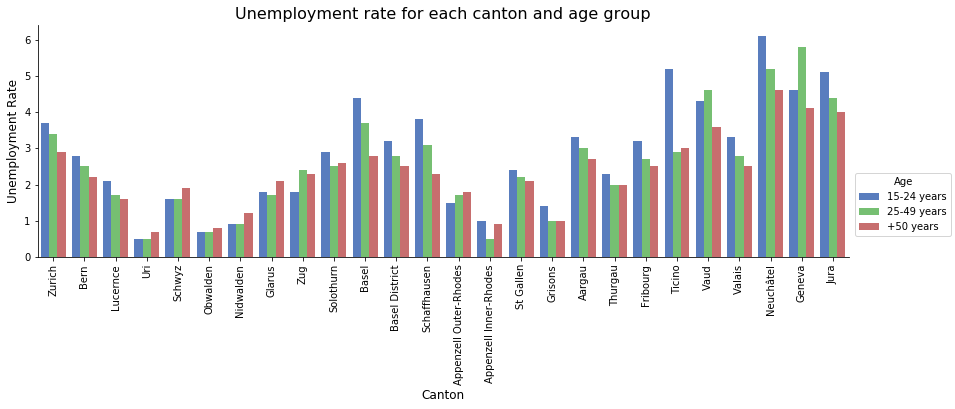

In [26]:
g = sns.factorplot(
    x='Canton', y='Unemployment_rate', hue='Age', 
    data=amstat_age, size=4, aspect=3, kind='bar', palette='muted'
)
g = g.set_ylabels("Unemployment Rate", size=12)
g = g.set_xlabels(size=12)
g = g.set_xticklabels(rotation=90)
plt.title("Unemployment rate for each canton and age group", size=16)

Text(0.5,1,'Average unemployment rate over all cantons by Age')

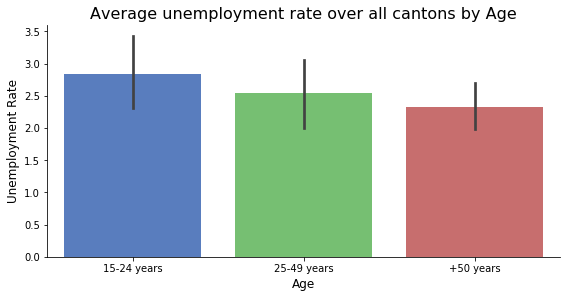

In [27]:
g = sns.factorplot(
    x='Age', y='Unemployment_rate',
    data=amstat_age,
    size=4, aspect=2, kind='bar', palette='muted'
)
g = g.set_ylabels("Unemployment Rate", size=12)
g = g.set_xlabels(size=12)
plt.title("Average unemployment rate over all cantons by Age", size=16)

#### Discussion

Clearly, unemployment is highest with young adults (15-24 years), especially in Ticino it seems to be difficult for this age group to find a job. There are some exceptions, notably Geneva, Zug and Vaud, where most of the unemployed belong to the age group 25-49 years. However, the deviations between age groups for single cantons are small in general.

### Assignment 4
BONUS: using the map you have just built, and the geographical information contained in it, could you give a rough estimate of the difference in unemployment rates between the areas divided by the Röstigraben

#### The Röstigraben

The _Röstigraben_ is a humorous term for the boundary between the French and German speaking parts of Switzerland. Unfortunately for us, this border runs through several cantons and not along canton borders, so we will have to accept some unaccuracy, when we calculate the average unemployment rates for the language regions, as we only have the unemployment numbers on a cantonal level. 

The idea behind this analysis is that there are many cultural differences between the French and German speaking parts of Switzerland, so there might be some significant differences in the unemployment numbers as well. However, Ticino belongs to another language region entirely, so it might be wise to extend this analysis to the Italian region.

We will assign each canton to the majority language within that canton. This should yield a somewhat reasonable estimation of unemployment rates within language regions.

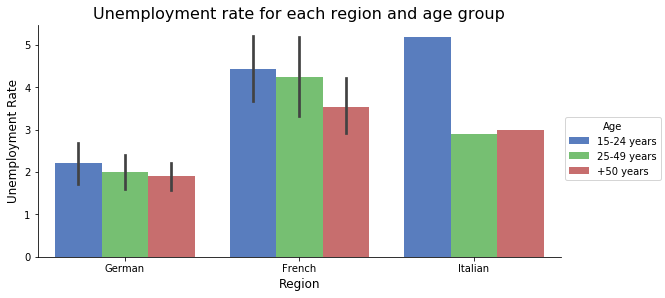

In [28]:
german = 'German'
french = 'French'
italian = 'Italian'
region_mapping = {
    'Appenzell Outer-Rhodes' : german,
    'Appenzell Inner-Rhodes' : german,
    'Aargau' : german,
    'Basel District' : german,
    'Basel' : german,
    'Bern' : german,
    'Fribourg' : french,
    'Geneva' : french,
    'Jura' : french,
    'Glarus' : german,
    'Grisons' : german,
    'Lucernce' : german,
    'Neuchâtel' : french,
    'Nidwalden' : german,
    'Obwalden' : german,
    'St Gallen' : german,
    'Schaffhausen' : german,
    'Solothurn' : german,
    'Schwyz' : german,
    'Ticino' : italian,
    'Thurgau' : german,
    'Uri' : german,
    'Valais' : french,
    'Vaud' : french,
    'Zug' : german,
    'Zurich' : german
}

amstat_regional = amstat_age.replace({'Canton' : region_mapping})['Canton']
amstat_regional = amstat_regional.to_frame('Region')

amstat_reg = amstat_age.merge(amstat_regional, left_index=True, right_index=True, how='inner')

g = sns.factorplot(
    x='Region', y='Unemployment_rate', hue='Age',
    data=amstat_reg, size=4, aspect=2, kind='bar', palette='muted'
)
g = g.set_ylabels("Unemployment Rate", size=12)
g = g.set_xlabels(size=12)
g = plt.title("Unemployment rate for each region and age group", size=16)

#### Discussion

There is quite a sharp difference in the unemployment rates of the different regions. The variance for the French region is understandably higher as it includes fewer cantons, but it is clear that unemployment is much lower in the German region compared to the others. A brief look into the literature told us, that it is not really clear where this difference comes from. Some possible explanations that were offered are:

* That the job market is more regulated in latin Switzerland (French and Italian regions)
* That the composition of the workforce in regards to education, especially among immigrants, is less optimal for those parts of Switzerland.

More information can be found in the following article of the Neue Zürcher Zeitung (German): https://www.nzz.ch/wirtschaft/beschaeftigung-in-der-schweiz-der-roestigraben-am-arbeitsmarkt-ld.1298290

### Map saving

Maps which we made during this exercise are saved in the .html format for future use.

In [29]:
m_a1_europe_path = os.path.join('maps', 'Assignment_1_Europe.html')
m_a1_europe.save(m_a1_europe_path)

m_a2_switzerland_path = os.path.join('maps', 'Assignment_2_Switzerland.html')
m_a2_switzerland.save(m_a2_switzerland_path)

m_a3_switzerland_path = os.path.join('maps', 'Assignment_3_Switzerland.html')
m_a3_switzerland.save(m_a3_switzerland_path)